# Transport calculations from SA Calculations
*Akira Di Sandro, 7/10/20*
<br> In this notebook, I will be calculating model transport data from the SA calculations as well as my transport calculation code from before.

## 1. Import Packages as usual

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import xarray as xr
xr.set_options(display_style='html')
import intake
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import sectionate

## 2. Open Dataset & Load in 'ocean_static.nc'

In [3]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)

In [4]:
dog = col.search(source_id='GFDL-CM4', experiment_id='historical', variable_id=['uo','vo'], grid_label='gn')
dog.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,uo,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN,20180701
1,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,vo,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN,20180701


In [5]:
dset_dict = dog.to_dataset_dict(zarr_kwargs={'consolidated': True})
list(dset_dict.keys())


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']

In [6]:
grid = dset_dict['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']
grid

<xarray.Dataset>
Dimensions:    (bnds: 2, lev: 35, member_id: 1, time: 1980, x: 1440, y: 1080)
Coordinates:
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lat        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
    lon        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
  * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * bnds       (bnds) float64 1.0 2.0
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
Data variables:
    uo         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 35, 1080, 1440), meta=np.ndarray>
    vo         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 35, 1080, 1440), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:             CMIP
    source_id:               GFDL-CM4
    mip_era:                 CMIP6
    institution_id:          NOAA-GFDL
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.NOAA-GFDL.G...
    tracking_id:             hdl:21.14100/d0ebcd36-d2cd-442e-a8d9-8f7a27168a2...
    table_id:                Omon
    initialization_index:    1
    parent_mip_era:          CMIP6
    parent_variant_label:    r1i1p1f1
    history:                 File was processed by fremetar (GFDL analog of C...
    variant_info:            N/A
    source:                  GFDL-CM4 (2018): \naerosol: interactive\natmos: ...
    source_type:             AOGCM
    variant_label:           r1i1p1f1
    branch_time_in_child:    0.0
    data_specs_version:      01.00.27
    references:              see further_info_url attribute
    experiment_id:           historical
    physics_index:           1
    realm:                   ocean
    product:                 model-output
    parent_activity_id:      CMIP
    experiment:              historical
    institution:             National Oceanic and Atmospheric Administration,...
    parent_experiment_id:    piControl
    grid:                    ocean data on native grid tripolar - nominal 0.2...
    parent_source_id:        GFDL-CM4
    nominal_resolution:      25 km
    frequency:               mon
    branch_method:           standard
    sub_experiment_id:       none
    comment:                 <null ref>
    contact:                 gfdl.climate.model.info@noaa.gov
    parent_time_units:       days since 0001-1-1
    realization_index:       1
    license:                 CMIP6 model data produced by NOAA-GFDL is licens...
    sub_experiment:          none
    forcing_index:           1
    grid_label:              gn
    status:                  2019-08-06;created;by nhn2@columbia.edu
    branch_time_in_parent:   36500.0
    title:                   NOAA GFDL GFDL-CM4 model output prepared for CMI...
    intake_esm_dataset_key:  CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn

In [7]:
o_s = xr.open_dataset('ocean_static.nc')
o_s

<xarray.Dataset>
Dimensions:       (time: 1, xh: 1440, xq: 1440, yh: 1080, yq: 1080)
Coordinates:
  * xh            (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh            (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * time          (time) object 1900-01-01 00:00:00
  * xq            (xq) float64 -299.6 -299.3 -299.1 -298.9 ... 59.66 59.91 60.16
  * yq            (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.78 89.89 90.0
Data variables:
    areacello     (yh, xh) float32 ...
    deptho        (yh, xh) float32 ...
    hfgeou        (yh, xh) float32 ...
    sftof         (yh, xh) float32 ...
    Coriolis      (yq, xq) float32 ...
    geolon        (yh, xh) float32 ...
    geolat        (yh, xh) float32 ...
    geolon_c      (yq, xq) float32 ...
    geolat_c      (yq, xq) float32 ...
    geolon_u      (yh, xq) float32 ...
    geolat_u      (yh, xq) float32 ...
    geolon_v      (yq, xh) float32 ...
    geolat_v      (yq, xh) float32 ...
    wet           (yh, xh) float32 ...
    wet_c         (yq, xq) float32 ...
    wet_u         (yh, xq) float32 ...
    wet_v         (yq, xh) float32 ...
    dxt           (yh, xh) float32 ...
    dyt           (yh, xh) float32 ...
    dxCu          (yh, xq) float32 ...
    dyCu          (yh, xq) float32 ...
    dxCv          (yq, xh) float32 ...
    dyCv          (yq, xh) float32 ...
    areacello_cu  (yh, xq) float32 ...
    areacello_cv  (yq, xh) float32 ...
    areacello_bu  (yq, xq) float32 ...
    basin         (yh, xh) int32 ...
Attributes:
    filename:   19000101.ocean_static.nc
    title:      OM4_SIS2_cgrid_025
    grid_type:  regular
    grid_tile:  N/A

In [8]:
dxCv = o_s['dxCv']
dyCu = o_s['dyCu']
geolon_u = o_s['geolon_u']
geolat_u = o_s['geolat_u']
geolon_v = o_s['geolon_v']
geolat_v = o_s['geolat_v']

## 3. Open Cluster 

In [110]:
from dask.distributed import Client
from dask_gateway import Gateway


gateway = Gateway()  # connect to Gateway

cluster = gateway.new_cluster()  # create cluster
cluster.scale(10)  # scale cluster

client = Client(cluster)  # connect Client to Cluster

In [111]:
client

Client Scheduler: gateway://traefik-gcp-uscentral1b-prod-dask-gateway.prod:80/prod.a6640a6822b44b8098d69e18b27f0490 Dashboard: https://us-central1-b.gcp.pangeo.io/services/dask-gateway/clusters/prod.a6640a6822b44b8098d69e18b27f0490/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


## 4. UVdata Calculations

The following are the lat and lon from the observational data. I had to adjust the values so that they are in similar places and are still on land for the model data.
<br> (-4.78819598936245, 152.903)
<br> (-5.137642131304778, 154.555)

In [17]:
lat1 = -4.78819598936245
lon1 = -208.21236
lat2 = -5.989064
lon2 = -205.234668

In [18]:
isec, jsec, xsec, ysec = sectionate.create_section(grid['lon'], grid['lat'], lon1, lat1, lon2, lat2)

best fit is rounding down


In [19]:
uvpoints = sectionate.transports_C.MOM6_UVpoints_from_section(isec, jsec)
data = np.empty((len(uvpoints),5))
count = 0

for i in range(len(uvpoints)):
    point = uvpoints[i]
    pttype, i, j = point
    i = int(i)
    j = int(j)
    if pttype == 'U':
        lon = geolon_u.isel(xq=i, yh=j).values
        lat = geolat_u.isel(xq=i, yh=j).values
        data[count] = [0, i, j, lon, lat]  
        count += 1
    else:
        lon = geolon_v.isel(xh=i, yq=j).values
        lat = geolat_v.isel(xh=i, yq=j).values
        data[count] = [1, i, j, lon, lat]  
        count += 1
# print(f'{point[0]}, {point[1]}, {point[2]}, {lon}, {lat}')

In [22]:
data

array([[   1.        ,  368.        ,  483.        , -207.875     ,
          -4.8691287 ],
       [   1.        ,  369.        ,  483.        , -207.625     ,
          -4.8691287 ],
       [   0.        ,  369.        ,  483.        , -207.5       ,
          -4.9936657 ],
       [   1.        ,  370.        ,  482.        , -207.375     ,
          -5.11817932],
       [   1.        ,  371.        ,  482.        , -207.125     ,
          -5.11817932],
       [   1.        ,  372.        ,  482.        , -206.875     ,
          -5.11817932],
       [   0.        ,  372.        ,  482.        , -206.75      ,
          -5.24266911],
       [   1.        ,  373.        ,  481.        , -206.625     ,
          -5.36713362],
       [   1.        ,  374.        ,  481.        , -206.375     ,
          -5.36713362],
       [   0.        ,  374.        ,  481.        , -206.25      ,
          -5.49157286],
       [   1.        ,  375.        ,  480.        , -206.125     ,
          -5

## 5. Surface Area Calculations
I want to use the udata and vdata (hopefully the i and j will alternate in the way they're supposed to) to the use the corresponding 'x' and 'y' points to save the side lengths into a vector. I then need to use those side lengths and multiply by 'thkcello' (that's actually missing from this) to get the surface areas for each grid cell in the cross section that I'm interested in. Once I have this information, I can calculate transport the way I wanted to before.

Make vector 'dsides' that stores the different lengths from i,j-point to i,j-point to then multiply by depths to get SA values.

In [23]:
dsides = []
for d in data:
    dtype,i,j,lon,lat = d
    i = int(i)
    j = int(j)
    if dtype == 0:
        dy = dyCu.isel(xq=i,yh=j).values
        dsides = np.append(dsides, dy)
    else:
        dx = dxCv.isel(xh=i,yq=j).values
        dsides = np.append(dsides, dx)
dsides

array([27728.84375   , 27728.84375   , 27723.62304688, 27718.31445312,
       27718.31445312, 27718.31445312, 27712.83398438, 27707.265625  ,
       27707.265625  , 27701.52539062, 27695.69726562, 27695.69726562,
       27695.69726562, 27689.69921875, 27683.61328125])

Now, I need to calculate the depth variables for each point.

In [24]:
deepest = []
for d in data:
    dtype,i,j,lon,lat = d
    i,j = int(i),int(j)
    depth = o_s['deptho'].isel(xh=i,yh=j).values
    deepest = np.append(deepest,depth)
deepest

array([ 292.12902832, 2637.10717773, 2637.10717773, 2762.68359375,
       2256.46606445, 2050.14355469, 2050.14355469, 3594.00415039,
       3715.14355469, 3715.14355469, 2267.27685547, 1082.11962891,
        695.87408447,  695.87408447,  227.66700745])

In [25]:
lev = grid['lev']
lev.values

array([2.5000e+00, 1.0000e+01, 2.0000e+01, 3.2500e+01, 5.1250e+01,
       7.5000e+01, 1.0000e+02, 1.2500e+02, 1.5625e+02, 2.0000e+02,
       2.5000e+02, 3.1250e+02, 4.0000e+02, 5.0000e+02, 6.0000e+02,
       7.0000e+02, 8.0000e+02, 9.0000e+02, 1.0000e+03, 1.1000e+03,
       1.2000e+03, 1.3000e+03, 1.4000e+03, 1.5375e+03, 1.7500e+03,
       2.0625e+03, 2.5000e+03, 3.0000e+03, 3.5000e+03, 4.0000e+03,
       4.5000e+03, 5.0000e+03, 5.5000e+03, 6.0000e+03, 6.5000e+03])

In [26]:
maxdeep = deepest.max()
maxdeep

3715.1435546875

After talking to Marion, I realized I need to change the way I'm thinking about 'lev' because this variable stores the midpoint of each grid cell. I need to make a calculation that works around this.

The above code is too simple; it only finds the distance between the midpoints of gridcells. The code below does this more complicated recursive function. I only need to plug in up to 4,000 since that's the first midpoint lev value that is larger than maxdeep. Initial 'depth' to plug into function would be 0.
<br> maybe it doesn't have to be recursive.

In [27]:
def find_dz(lev):
    mylev = []
    depth = 0
    for i in range(len(lev)):
        dz = abs(depth-lev[i])*2
        depth += dz
        mylev = np.append(mylev,dz)
    return mylev

In [28]:
mylev = find_dz(lev[:30])
mylev

array([  5. ,  10. ,  10. ,  15. ,  22.5,  25. ,  25. ,  25. ,  37.5,
        50. ,  50. ,  75. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 175. , 250. , 375. , 500. ,
       500. , 500. , 500. ])

I want to make a (point x depth) array now that stores in all the 'dz' that correspond to each point in the cross section.

In [29]:
SA = np.empty((dsides.shape[0], mylev.shape[0]))

In [30]:
def calc_SA(SA, dsides, mylev, deepest, lev):
    for i in range(len(dsides)):
        deep = deepest[i]
        for j in range(len(mylev)):
            if np.isnan(deep):
                SA[i][j] = 0
            elif lev[j] < deep:
                SA[i][j] = dsides[i] * mylev[j]
            elif lev[j-1] < deep and lev[j] > deep:
                dif = deep - lev[j-1].values
                SA[i][j] = dsides[i] * dif
            else:
                SA[i][j] = 0
    return SA

In [31]:
SAcalculated = calc_SA(SA,dsides,mylev,deepest,lev)
SAcalculated

array([[  138644.21875   ,   277288.4375    ,   277288.4375    ,
          415932.65625   ,   623898.984375  ,   693221.09375   ,
          693221.09375   ,   693221.09375   ,  1039831.640625  ,
         1386442.1875    ,  1386442.1875    ,  1168189.24363327,
               0.        ,        0.        ,        0.        ,
               0.        ,        0.        ,        0.        ,
               0.        ,        0.        ,        0.        ,
               0.        ,        0.        ,        0.        ,
               0.        ,        0.        ,        0.        ,
               0.        ,        0.        ,        0.        ],
       [  138644.21875   ,   277288.4375    ,   277288.4375    ,
          415932.65625   ,   623898.984375  ,   693221.09375   ,
          693221.09375   ,   693221.09375   ,  1039831.640625  ,
         1386442.1875    ,  1386442.1875    ,  2079663.28125   ,
         2772884.375     ,  2772884.375     ,  2772884.375     ,
         2772884.375    

## 6. Calculating Transport from this SA data

Originally, I just copied the code from my sectionate/examples/trans_calc.ipynb transport calculation code.

In [104]:
def calc_model_transport(ds, t_step, data, SA):
    total = []
    for d in range(len(data)):
        dtype,i,j,lon,lat = data[d]
        i,j = int(i),int(j)
        if dtype == 0:          #if 'U' point
            velocity = ds['uo'].isel(x=i,y=j,time=t_step).values[0]   #velocity (m/s)
        else:                   #if 'V' point
            velocity = ds['vo'].isel(x=i,y=j,time=t_step).values[0]   #velocity (m/s)
        vel = []                                                      #vel (m/s)
        for i in range(len(velocity)):
            if np.isnan(velocity[i]):
                vel = np.append(vel, 0)
            else:
                vel = np.append(vel, velocity[i])
        pt_total=0
        #print(vel)
        for row in range(len(SA[d])):
            pt_total += vel[row] * SA[d,row]       #pt_total (m/s) * (m^2)
            #print(pt_total)
        total = np.append(total, pt_total)
        #print(np.sum(total))
    transport = np.sum(total) * (10**-6)
    return transport

In [95]:
data[0,1]

368.0

In [99]:
velocity = grid['uo'].isel(x=int(data[0,1]),y=int(data[0,2]),time=1950).values[0]
velocity

array([0.07104545, 0.09236521, 0.12628327, 0.07172362, 0.0711943 ,
       0.09929445, 0.08407839, 0.07999168, 0.06578434, 0.05851553,
       0.06866226, 0.02996441, 0.00082925, 0.00077657, 0.000732  ,
       0.00069617, 0.00066835, 0.00064654, 0.00062655, 0.0006053 ,
       0.00058229, 0.00055926, 0.00053835, 0.00050933, 0.00047259,
       0.00042708, 0.00035917,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan],
      dtype=float32)

In [100]:
vel = []                                                      #vel (m/s)
for i in range(len(velocity)):
    if np.isnan(velocity[i]):
        vel = np.append(vel, 0)
    else:
        vel = np.append(vel, velocity[i])
vel

array([0.07104545, 0.09236521, 0.12628327, 0.07172362, 0.0711943 ,
       0.09929445, 0.08407839, 0.07999168, 0.06578434, 0.05851553,
       0.06866226, 0.02996441, 0.00082925, 0.00077657, 0.000732  ,
       0.00069617, 0.00066835, 0.00064654, 0.00062655, 0.0006053 ,
       0.00058229, 0.00055926, 0.00053835, 0.00050933, 0.00047259,
       0.00042708, 0.00035917, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [101]:
pt_total=0
for row in range(len(SA[0]):
    pt_total += vel[row] * SA[0,row]       #pt_total (m/s) * (m^2)
total = np.append(total, pt_total)
total

NameError: name 'total' is not defined

In [105]:
calc_trans = calc_model_transport(grid,1950,data,SAcalculated)

In [106]:
calc_trans

31.30496074084691

In [107]:
times = np.arange(1950,1971)
times

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970])

In [108]:
times1 = grid['time'][1950:1971]
times1

<xarray.DataArray 'time' (time: 21)>
array([cftime.DatetimeNoLeap(2012-07-16 12:00:00),
       cftime.DatetimeNoLeap(2012-08-16 12:00:00),
       cftime.DatetimeNoLeap(2012-09-16 00:00:00),
       cftime.DatetimeNoLeap(2012-10-16 12:00:00),
       cftime.DatetimeNoLeap(2012-11-16 00:00:00),
       cftime.DatetimeNoLeap(2012-12-16 12:00:00),
       cftime.DatetimeNoLeap(2013-01-16 12:00:00),
       cftime.DatetimeNoLeap(2013-02-15 00:00:00),
       cftime.DatetimeNoLeap(2013-03-16 12:00:00),
       cftime.DatetimeNoLeap(2013-04-16 00:00:00),
       cftime.DatetimeNoLeap(2013-05-16 12:00:00),
       cftime.DatetimeNoLeap(2013-06-16 00:00:00),
       cftime.DatetimeNoLeap(2013-07-16 12:00:00),
       cftime.DatetimeNoLeap(2013-08-16 12:00:00),
       cftime.DatetimeNoLeap(2013-09-16 00:00:00),
       cftime.DatetimeNoLeap(2013-10-16 12:00:00),
       cftime.DatetimeNoLeap(2013-11-16 00:00:00),
       cftime.DatetimeNoLeap(2013-12-16 12:00:00),
       cftime.DatetimeNoLeap(2014-01-16 12:00:00),
       cftime.DatetimeNoLeap(2014-02-15 00:00:00),
       cftime.DatetimeNoLeap(2014-03-16 12:00:00)], dtype=object)
Coordinates:
  * time     (time) object 2012-07-16 12:00:00 ... 2014-03-16 12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    calendar_type:  noleap
    description:    Temporal mean
    long_name:      time
    standard_name:  time

In [112]:
model_trans = []
for time in times:
    mon_trans = calc_model_transport(grid,time,data,SAcalculated)
    model_trans = np.append(model_trans, mon_trans)

In [113]:
model_trans

array([31.30496074, 36.92364615, 36.74860147, 28.81093822, 21.17660814,
       16.53043191,  9.46905783,  6.1717705 , 12.62169859, 10.34350452,
       19.14498937, 22.37436684, 25.33285698, 31.17355758, 25.43218547,
       29.87634598, 30.28443114, 25.20008762, 14.05108888,  1.10566146,
        6.23865822])

## 7. Plotting Transport

Data is not good yet but I decided to make a plot to at least see if the general pattern matches observational data.

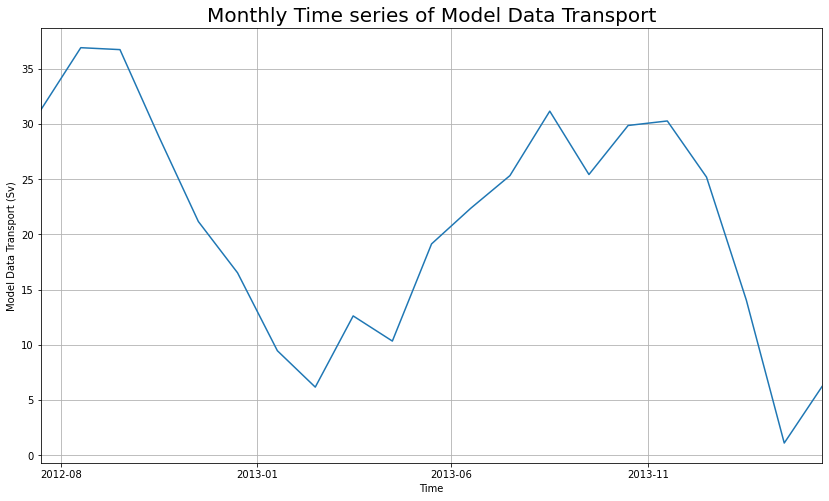

In [114]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set_ylabel('Model Data Transport (Sv)')
ax.set_xlabel('Time')
label = 'Monthly Average of Model Transport'
ax.plot(times1, model_trans, label=label)
ax.set_xlim(times1.values[0], times1.values[-1])
ax.grid(True)
plt.title('Monthly Time series of Model Data Transport', fontsize=20)
model_trans_plot = plt.show()

## Closing Clusters after use

In [115]:
client.close()
cluster.close()